# Programming Seminar. Rosenbrock test function

#### 2-dimensional Rosenbrock function
$$f(x) = 100 (x_2 - x_1^2)^2 + (1 - x_1)^2 $$

Minimum at $[1, 1].$

Starting points for algorithms:
$$x^a = [0, 0]^T$$
$$x^b = [-1, -1]^T$$
$$x^c = [-0.9, -0.8]^T$$
$$x^d = [-0.9, 1.1]^T$$

#### Multi-dimensional bad function (by Nesterov)
$$f(x) = \frac{1}{4} (1 - x_1)^2 + \sum_{i=2}^{n} (x_{i} - 2x_{i-1}^2 + 1)^2, \;\; x \in \mathbb{R}^n$$

Take $n = 3,\ldots,6$.

$$x^a = [0, 0, \ldots, 0]^T$$
$$x^b = [-1, 1, \ldots, 1]^T$$
$$x^c = [-1, 0.9, \ldots, 0.9]^T$$

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 2D Rosenbrock function
def rosen2d(x):
    return rosen2d_XY(x[0], x[1])
# same, but accepts arrays (useful for plotting)
def rosen2d_XY(X, Y):
    return 100*(Y - X**2)**2 + (1 - X)**2

# Gradient of 2D Rosenbrock function
def rosen2d_grad(x):
    return np.array([400.0 * (x[0]**2 - x[1]*x[0]) + 2 * (x[0] - 1), 200 * (x[1] - x[0]**2)])

# N-dimensional function
def rosen_like_n(x):
    n = len(x)
    f = 1.0/4.0 * (1 - x[0])**2
    for i in range(1, n):
        f += (x[i] - 2.0 * x[i-1]**2 + 1)**2
    return f

def rosen_like_n_grad(x):
    n = x.size
    my_x = x.reshape(n,1)
    grad = np.array([16*x[0]**3 - 8*x[0]*x[1] - 8.5*x[0]])
    for i in range(1,n-1,1):
        grad = np.append(grad, np.asarray([16*x[i]**3 + 2*x[i] - 8*x[i]*x[i+1] - 4*x[i-1]**2 - 7]))
    grad = np.append(grad, np.asarray([2*(x[n-1] - 2*x[n-2]**2 + 1)]))
#    grad = np.zeros(n-2)
#    grad = 
#    grad = grad.reshape(n,1)
    return grad # TODO

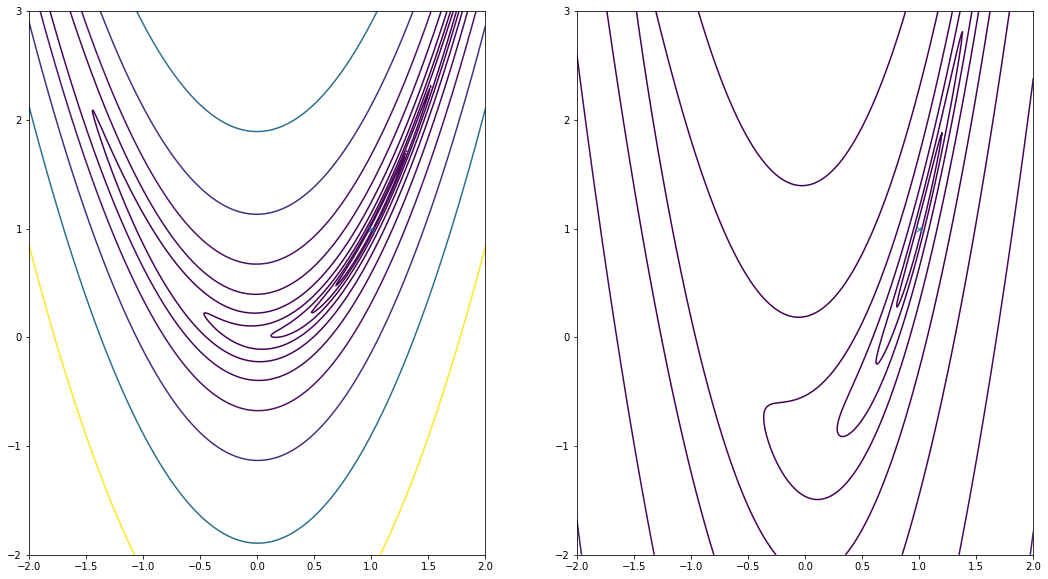

In [24]:
_, axes = plt.subplots(1,2,figsize=(18, 10))

# plot Rosenbrock contours
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 3, 400))
Z_rosen = rosen2d_XY(X, Y)
axes[0].plot([1], [1], 'x')
axes[0].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))

# plot Nesterov's function contours
Z_nest2 = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_nest2[i,j] = rosen_like_n([X[i,j], Y[i,j]])
axes[1].plot([1], [1], 'x')
axes[1].contour(X, Y, Z_nest2, np.logspace(-2, 3, 10))
plt.show()

[[  0.00000000e+00   0.00000000e+00]
 [  2.00000000e-03   0.00000000e+00]
 [  3.99440000e-03   8.00000000e-07]
 ..., 
 [  7.07106781e-02   5.00000000e-03]
 [  7.07106781e-02   5.00000000e-03]
 [  7.07106781e-02   5.00000000e-03]]
[[ -1.00000000e+000  -1.00000000e+000]
 [ -9.96000000e-001  -6.00000000e-001]
 [ -1.14977440e+000  -2.81596800e-001]
 [ -1.54475820e+000   3.91187942e-002]
 [ -2.51835148e+000   5.08550616e-001]
 [ -5.56043613e+000   1.67525933e+000]
 [ -2.16407642e+001   7.52389745e+000]
 [ -2.74053709e+002   9.96836531e+001]
 [ -4.12431478e+004   1.51008340e+004]
 [ -9.29562428e+008   3.40211528e+008]
 [ -4.72133666e+017   1.72817262e+017]
 [ -1.21801218e+035   4.45820397e+034]
 [ -8.10627341e+069   2.96710736e+069]
 [ -3.59055408e+139   1.31423337e+139]
 [ -7.04436185e+278   2.57841572e+278]
 [             -inf               inf]]


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


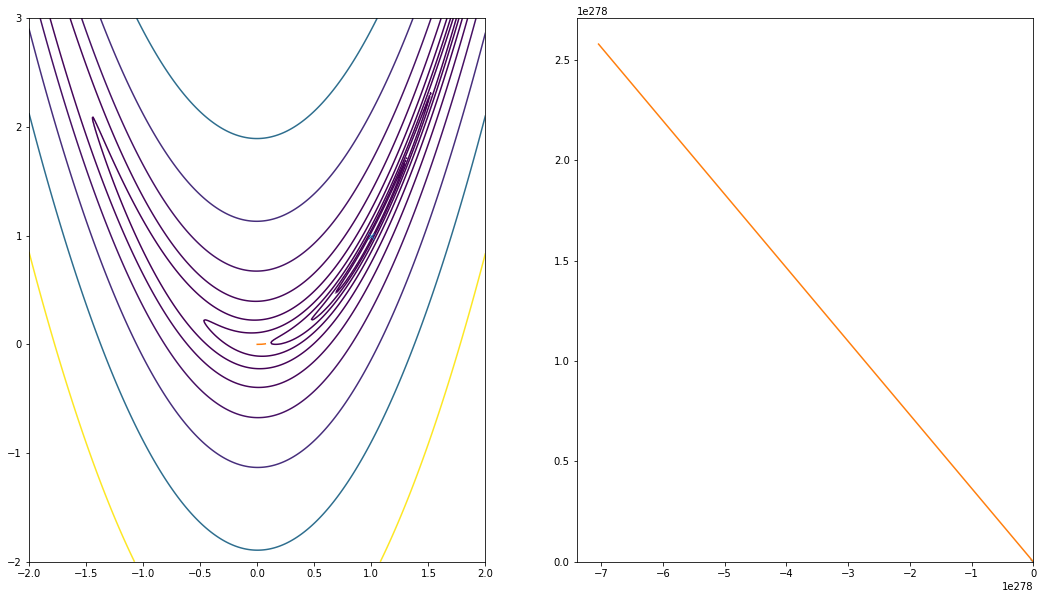

In [53]:
# Rosenbrock Workbench for a method
_, axes = plt.subplots(1,2,figsize=(18, 10))
axes[0].plot([1], [1], 'x')
axes[0].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))
axes[1].plot([1], [1], 'x')
axes[1].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))

# initial points (2D)
x_a = np.array([0, 0])
x_b = np.array([-1, -1])
x_c = np.array([-0.9, -0.8])
x_d = np.array([-0.9, 1.1])

# Some function,
# accepts, initial point (a numpy vector), function, its derivative, and (optionally) parameters
# return sequence of points
def const_step_solver(x0, f, f_grad, params = None):
    x = x0.copy()
    x_array = [x]
    gamma = 0.001
    # stopping rule
    k = 0
    while f(x) > 1e-7 and k < 1e5:
        x = x - gamma * f_grad(x)
        x_array += [x]
        k += 1
    return x_array

# run solver for two different initial conditions
x_data_as_embedded_lists = const_step_solver(x_a, rosen2d, rosen2d_grad)
x_data = np.array(x_data_as_embedded_lists)
axes[0].plot(x_data[:, 0], x_data[:, 1],) 
print(x_data)

x_data_as_embedded_lists = const_step_solver(x_b, rosen2d, rosen2d_grad)
x_data = np.array(x_data_as_embedded_lists)
axes[1].plot(x_data[:, 0], x_data[:, 1],) 
print(x_data)
    
plt.show()

In [54]:
x_a = np.array([-1, 1])
x_data_as_embedded_lists = const_step_solver(x_a, rosen_like_n, rosen_like_n_grad)
x_data = np.array(x_data_as_embedded_lists)
axes[0].plot(x_data[:, 0], x_data[:, 1],) 
print(x_data)

[[ -1.           1.        ]
 [ -1.0005       1.        ]
 [ -1.00098424   1.000004  ]
 ..., 
 [ -2.67541407  13.25372188]
 [ -2.67542565  13.25384579]
 [ -2.67543723  13.25396971]]


In [55]:
rosen_like_n_grad(x_data[x_data.shape[0]-1])

array([ 0.01157963, -0.12391797])

In [56]:
rosen_like_n(x_data[x_data.shape[0]-1])

3.3810486154334147

In [57]:
x_data.shape

(100001, 2)